In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#merging processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "parent_clean.csv", header=0)
df.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap,aggressive
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,...,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,-10.534279,0
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,...,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,3.903518,0
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,...,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,-2.147462,0
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,...,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,2.706697,0
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,...,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,18.208689,0


In [25]:
df.columns.tolist()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'speed_gap',
 'aggressive']

In [26]:
df['eventSensorDetectionMthd'] = pd.to_numeric(df['eventSensorDetectionMthd'], errors='coerce')
df = df.dropna(subset=['eventSensorDetectionMthd'])
df['eventSensorDetectionMthd'] = df['eventSensorDetectionMthd'].astype(int)

df = df[df['eventSensorDetectionMthd'] == 2].copy()
print(df['eventSensorDetectionMthd'].unique())

[2]


In [27]:
# columns to keep (with the earlier-dropped ones removed)
keep_cols = [
    'is_ios',
    'source_file',
    "eventType",
    "eventSampleSpeed",
    "eventDurationSeconds",
    "eventMilesDriven",
    "eventSensorDetectionMthd",
    "eventGPSSignalStrength",
    "eventStartSpeed",
    "eventEndSpeed",
    "memsMedianLateralAccel",
    "memsP75LateralAccel",
    "memsP95LateralAccel",
    "gyro_angular_change_per_second",
    "gyroAngleChange",
    "mems_radius"
]

# keep only these columns
df = df[[c for c in keep_cols if c in df.columns]]

print(df.columns.to_list())

['is_ios', 'source_file', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventMilesDriven', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'memsMedianLateralAccel', 'memsP75LateralAccel', 'memsP95LateralAccel', 'gyro_angular_change_per_second', 'gyroAngleChange', 'mems_radius']


In [28]:
df

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2,1.480796,17.323687,6.789408,0.559022,0.791192,1.637599,9.521707,69.319600,22.941639
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2,1.693853,6.197542,10.101060,0.850605,1.127723,1.371737,11.245602,84.723694,20.737572
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2,21.173470,11.229438,9.081976,3.568163,3.926081,4.297326,24.616348,105.462135,18.996666
21,0,android_turns.csv,4.0,14.316982,5.161219,0.016126,2,2.119146,14.597254,14.814849,2.021923,2.312111,2.583118,16.502178,85.766960,17.712963
23,0,android_turns.csv,5.0,12.853457,4.444125,0.015564,2,17.857143,13.242683,13.667703,1.477237,1.889622,2.267666,20.320848,91.114716,8.455564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56779,1,ios_turns.csv,4.0,13.167086,7.162250,0.024603,2,4.746903,19.614061,15.983868,0.972598,1.631333,2.624678,12.356845,88.994500,25.973368
56780,1,ios_turns.csv,5.0,13.334327,4.735000,0.023439,2,4.746996,7.568688,19.133644,2.160563,2.875265,3.657088,15.328823,73.191910,26.875540
56781,1,ios_turns.csv,5.0,16.700228,6.153750,0.023814,2,2.506748,22.490547,18.509857,2.561672,3.863195,4.442121,15.431073,95.579620,37.890446
56782,1,ios_turns.csv,4.0,24.178942,10.135531,0.076403,2,2.379687,12.947326,36.089260,0.552454,2.194608,3.994016,9.256821,94.195100,116.376460


In [29]:
df.shape

(29012, 16)

In [30]:
df.groupby("source_file")["memsMedianLateralAccel"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,591.0,1.396485,0.717440,0.002383,0.924690,1.407833,1.873248,3.814201
ios_turns.csv,28421.0,1.498564,0.862527,0.000000,0.849677,1.427169,2.037106,7.995974


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/2024595547.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


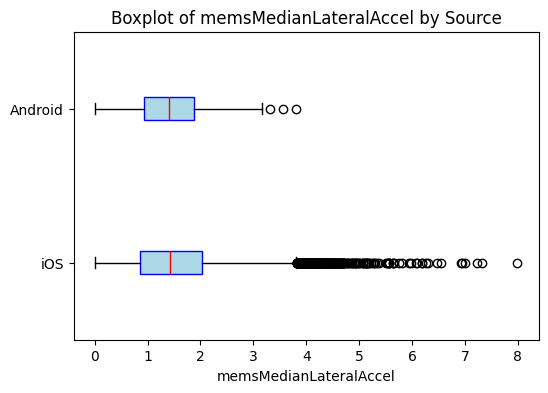

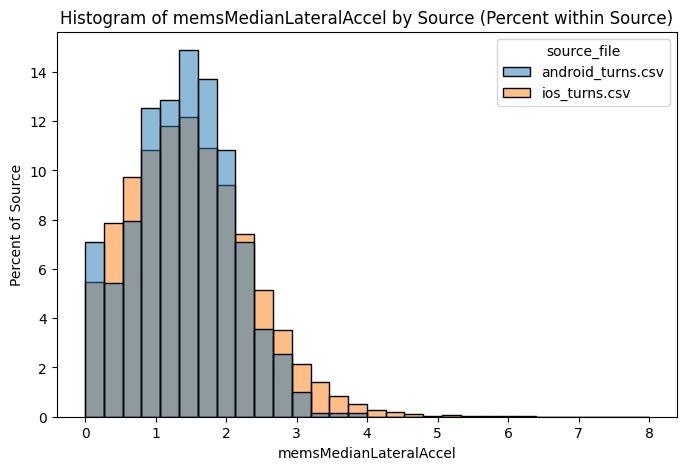

In [31]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsMedianLateralAccel']
android_data = df[df['is_ios'] == 0]['memsMedianLateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsMedianLateralAccel by Source")
plt.xlabel("memsMedianLateralAccel")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsMedianLateralAccel", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsMedianLateralAccel by Source (Percent within Source)")
plt.xlabel("memsMedianLateralAccel")
plt.ylabel("Percent of Source")
plt.show()

In [32]:
df[df['memsMedianLateralAccel'] > 15]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/4104596328.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


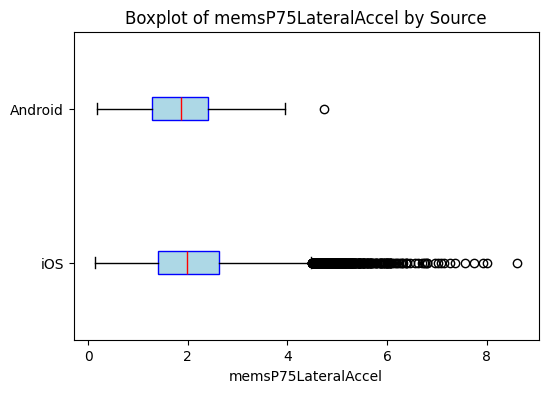

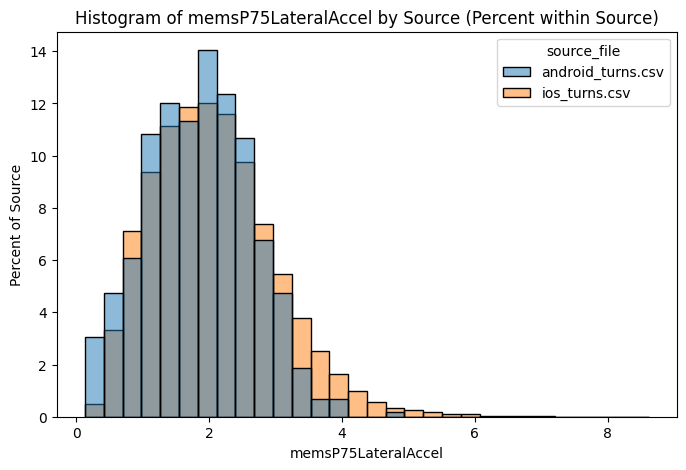

In [33]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP75LateralAccel']
android_data = df[df['is_ios'] == 0]['memsP75LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP75LateralAccel by Source")
plt.xlabel("memsP75LateralAccel")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP75LateralAccel", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP75LateralAccel by Source (Percent within Source)")
plt.xlabel("memsP75LateralAccel")
plt.ylabel("Percent of Source")
plt.show()

In [34]:
df[(df['memsP75LateralAccel'] > 15) & (df['source_file'] == 'android_turns.csv')]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius


In [ ]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['memsP95LateralAccel']
android_data = df[df['is_ios'] == 0]['memsP95LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of memsP95LateralAccel by Source")
plt.xlabel("memsP95LateralAccel")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="memsP95LateralAccel", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of memsP95LateralAccel by Source (Percent within Source)")
plt.xlabel("memsP95LateralAccel")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/1063449005.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


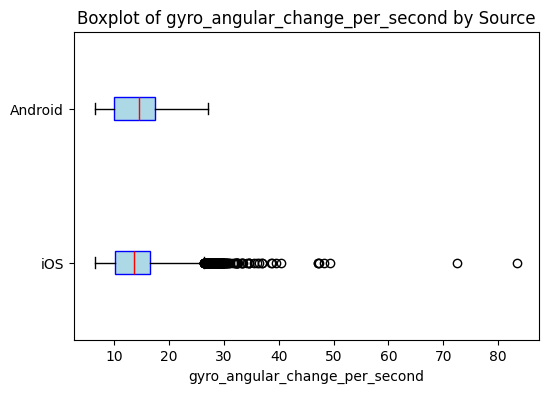

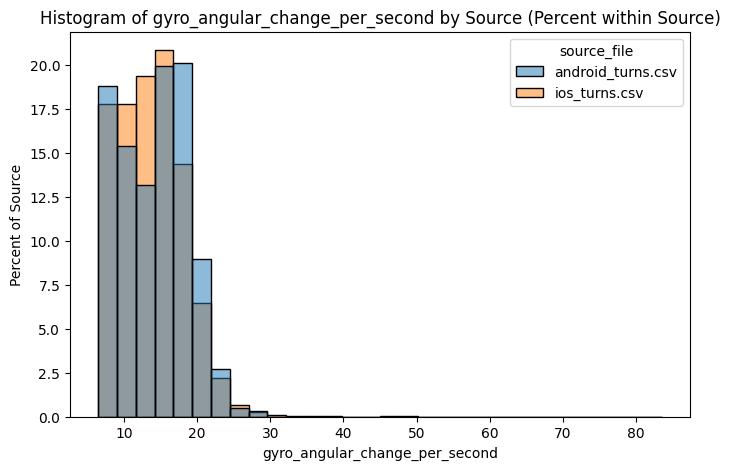

In [35]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyro_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['gyro_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyro_angular_change_per_second by Source")
plt.xlabel("gyro_angular_change_per_second")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyro_angular_change_per_second", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyro_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("gyro_angular_change_per_second")
plt.ylabel("Percent of Source")
plt.show()

In [36]:
df[df['gyro_angular_change_per_second'] > 100]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/4053563035.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


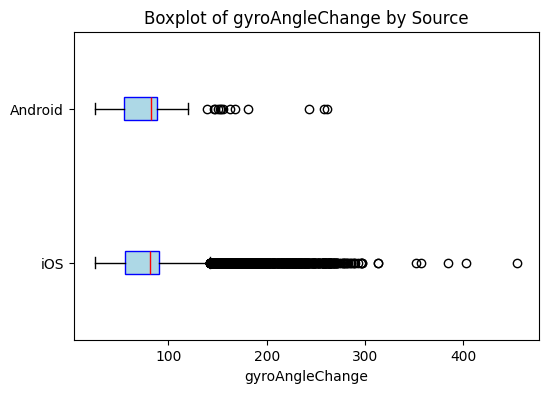

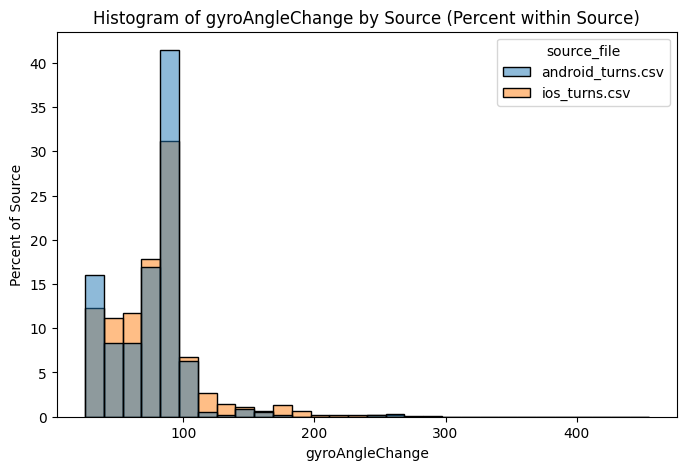

In [37]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gyroAngleChange']
android_data = df[df['is_ios'] == 0]['gyroAngleChange']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gyroAngleChange by Source")
plt.xlabel("gyroAngleChange")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gyroAngleChange", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gyroAngleChange by Source (Percent within Source)")
plt.xlabel("gyroAngleChange")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/2416860586.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


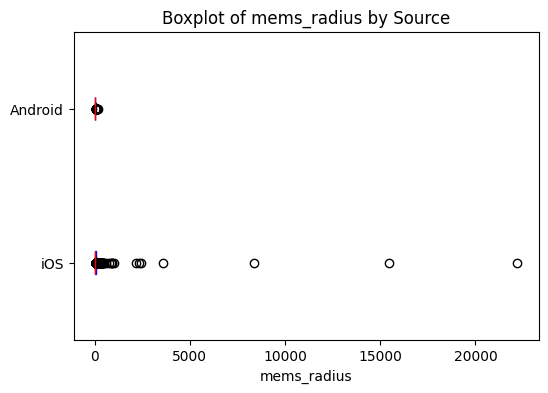

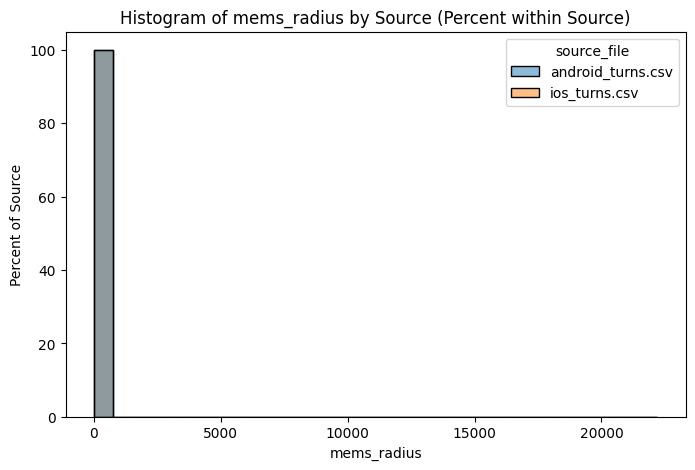

In [38]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['mems_radius']
android_data = df[df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,   # lets us color them
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of mems_radius by Source")
plt.xlabel("mems_radius")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Percent within Source)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

In [39]:
df[df['mems_radius'] > 1000]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius
3728,1,ios_turns.csv,5.0,55.248180,1.557375,0.000000,2,4.740929,55.248180,55.248180,2.575810,2.834851,3.485078,23.253540,37.143060,2425.4250
22184,1,ios_turns.csv,4.0,12.616565,3.303250,0.010145,2,4.714521,13.745711,11.726510,5.073143,5.531958,6.048472,11.996376,40.104460,2177.8210
31452,1,ios_turns.csv,5.0,35.203865,1.934656,0.009679,2,4.741171,35.284030,35.123700,0.602510,1.322065,3.762800,12.916212,25.509027,3593.3074
32106,1,ios_turns.csv,5.0,26.311007,2.722438,0.010604,2,4.792275,37.690940,16.964981,0.138241,0.402281,0.972770,14.860343,41.051304,8348.7730
39560,1,ios_turns.csv,4.0,83.934400,1.447938,0.023603,2,2.042409,83.322900,84.545890,6.927329,7.566165,8.080671,29.294144,43.594315,2346.2332
40114,1,ios_turns.csv,5.0,65.728380,1.075063,0.000000,2,2.394635,65.728380,65.728380,0.578341,2.242429,7.011611,33.427517,37.267654,15481.4100
42751,1,ios_turns.csv,5.0,55.965572,3.623141,0.046572,2,2.000000,56.082764,55.907455,0.423752,0.898089,1.467860,9.248580,33.877136,1003.3628
43268,1,ios_turns.csv,4.0,7.318969,4.246625,0.006059,2,10.000000,17.722033,0.000000,3.590098,3.894634,4.186846,10.234101,43.870400,22208.2500


In [40]:
# find all infinite values in mems_radius
df[np.isinf(df['mems_radius'])]

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianLateralAccel,memsP75LateralAccel,memsP95LateralAccel,gyro_angular_change_per_second,gyroAngleChange,mems_radius


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/2324194745.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


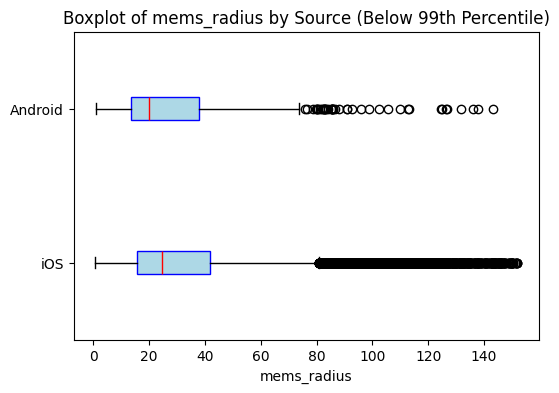

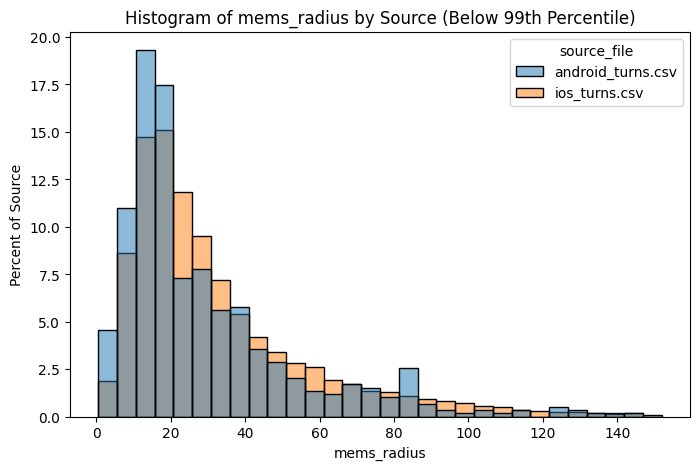

Original size: 29012
New size: 28721
Difference: 291


In [41]:
# Compute 99th percentile threshold
Q = df['mems_radius'].quantile(0.99)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 99th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/2550086605.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


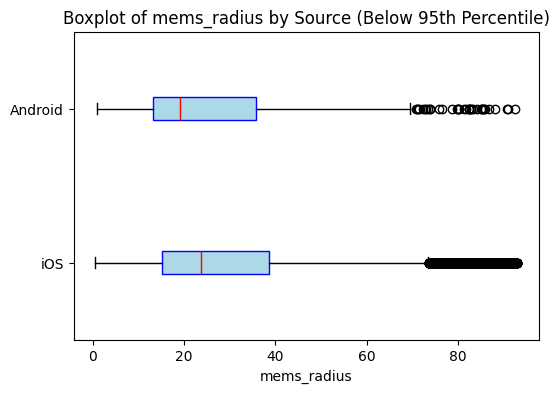

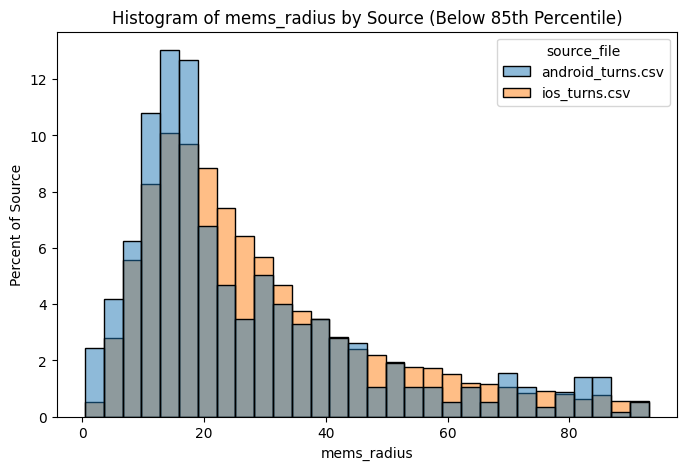

Original size: 29012
New size: 27561
Difference: 1451


In [42]:
# Compute 95th percentile threshold
Q = df['mems_radius'].quantile(0.95)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 95th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 85th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/3732571146.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


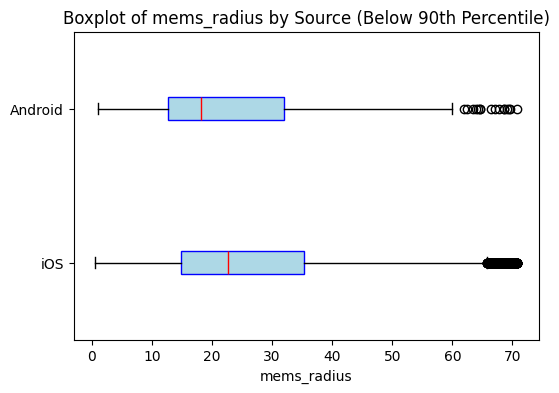

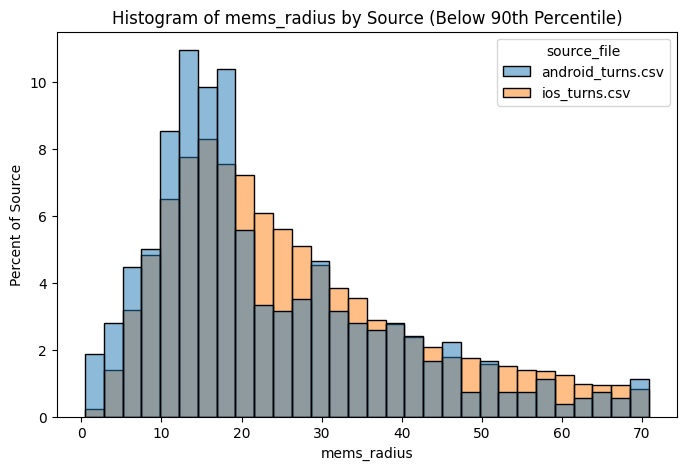

Original size: 29012
New size: 26110
Difference: 2902


In [43]:
# Compute 90th percentile threshold
Q = df['mems_radius'].quantile(0.90)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 90th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 90th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_1601/4029540304.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


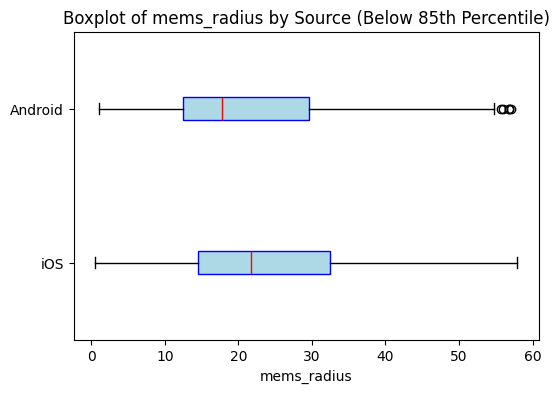

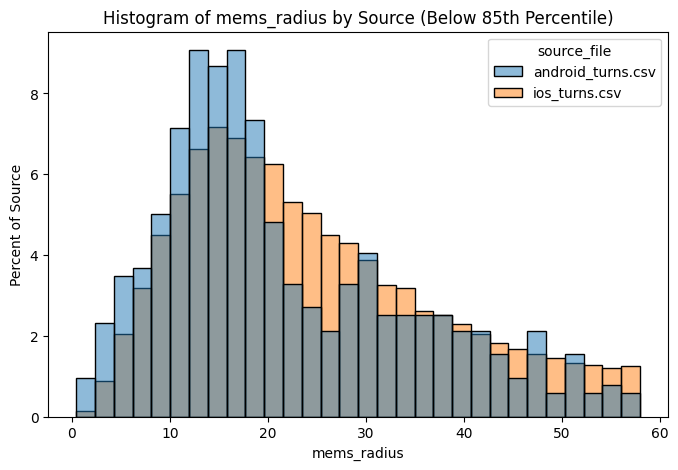

Original size: 29012
New size: 24660
Difference: 4352


In [44]:
# Compute 85th percentile threshold
Q = df['mems_radius'].quantile(0.85)

# Create a filtered copy without altering the original DataFrame
new_df = df[df['mems_radius'] <= Q].copy()

# ---------------------- BOX PLOT ----------------------
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['mems_radius']
android_data = new_df[new_df['is_ios'] == 0]['mems_radius']

# Make two horizontal boxplots side by side
plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,   # enables color fill
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of mems_radius by Source (Below 85th Percentile)")
plt.xlabel("mems_radius")
plt.show()

# ---------------------- HISTOGRAM ----------------------
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="mems_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of mems_radius by Source (Below 85th Percentile)")
plt.xlabel("mems_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

In [45]:
# Compute 95th percentile threshold
Q = df['mems_radius'].quantile(0.95)
df = df[df['mems_radius'] <= Q]

df.shape[0]

27561

In [47]:
# Save new_df to file to later load
new_df.to_pickle('state2_new_df.pkl')